In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define image dimensions and batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training and validation data
train_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/Dental_V12/Dental_V1/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/Dental_V12/Dental_V1/val',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Load the MobileNetV2 base model (excluding the top layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model to avoid retraining its weights
base_model.trainable = False

# Build the full model
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
epochs = 10
history = model.fit(train_data, validation_data=val_data, epochs=epochs)


Found 483 images belonging to 2 classes.
Found 15 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 771ms/step - accuracy: 0.5761 - loss: 0.9413 - val_accuracy: 0.6667 - val_loss: 0.6626
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 271ms/step - accuracy: 0.7367 - loss: 0.5116 - val_accuracy: 0.8000 - val_loss: 0.5916
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 227ms/step - accuracy: 0.7886 - loss: 0.4504 - val_accuracy: 0.7333 - val_loss: 0.5851
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 231ms/step - accuracy: 0.7669 - loss: 0.4544 - val_accuracy: 0.7333 - val_loss: 0.5734
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step - accuracy: 0.8364 - loss: 0.3789 - val_accuracy: 0.6667 - val_loss: 0.5376
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 257ms/step - accuracy: 0.8574 - loss: 0.3505 - val_accuracy: 0.6667 - val_loss: 0.5073
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 232ms/step - accuracy: 0.8869 - loss: 0.2965 - val_accuracy:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def predict_image(image_path, model):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return "Normal" if prediction[0][0] > 0.5 else "Abnormal"


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true labels and predicted labels
val_data.reset()  # Reset generator to start from the beginning
pred_probs = model.predict(val_data, verbose=1)
pred_labels = (pred_probs > 0.5).astype(int).flatten()
true_labels = val_data.classes

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=["Abnormal", "Normal"]))

# Print confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(true_labels, pred_labels)
print(cm)


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.60      0.50      0.55         6
      Normal       0.70      0.78      0.74         9

    accuracy                           0.67        15
   macro avg       0.65      0.64      0.64        15
weighted avg       0.66      0.67      0.66        15

Confusion Matrix:
[[3 3]
 [2 7]]


Found 483 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 475ms/step - accuracy: 0.4736 - loss: 0.9912 - val_accuracy: 0.4917 - val_loss: 0.6939
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 273ms/step - accuracy: 0.5077 - loss: 0.7014 - val_accuracy: 0.4917 - val_loss: 0.6952
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 305ms/step - accuracy: 0.5220 - loss: 0.6922 - val_accuracy: 0.4500 - val_loss: 0.6971
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 325ms/step - accuracy: 0.6104 - loss: 0.6817 - val_accuracy: 0.4750 - val_loss: 0.7188
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 279ms/step - accuracy: 0.5976 - loss: 0.6637 - val_accuracy: 0.4333 - val_loss: 0.6908
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 332ms/step - accuracy: 0.5992 - loss: 0.6538 - val_accuracy: 0.4500 - val_loss: 0.6944
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 289ms/step - accuracy: 0.6955 - loss: 0.6047 - val_accuracy: 0.4167 - val_loss: 0.7291
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 285ms/step - accuracy: 0.6956 - loss: 0.5422 - val_accuracy: 0

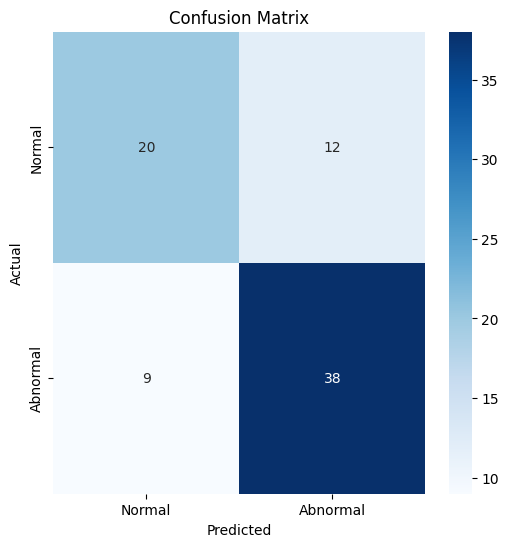

              precision    recall  f1-score   support

      Normal       0.69      0.62      0.66        32
    Abnormal       0.76      0.81      0.78        47

    accuracy                           0.73        79
   macro avg       0.72      0.72      0.72        79
weighted avg       0.73      0.73      0.73        79



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import shutil

# Define image dimensions and batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training and validation data
train_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/Dental_V12/Dental_V1/train',  # Path to dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Binary classification (normal/abnormal)
    subset='training'
)

val_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/Dental_V12/Dental_V1/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Use Functional API for a more flexible model
def build_model(input_shape):
    inputs = keras.Input(shape=input_shape)
    x = layers.Conv2D(32, (3,3), activation='relu')(inputs)
    x = layers.MaxPooling2D(2,2)(x)
    x = layers.Conv2D(64, (3,3), activation='relu')(x)
    x = layers.MaxPooling2D(2,2)(x)
    x = layers.Conv2D(128, (3,3), activation='relu')(x)
    x = layers.MaxPooling2D(2,2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Build and compile the model
model = build_model((128, 128, 3))
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
epochs = 10
history = model.fit(train_data, validation_data=val_data, epochs=epochs)

# Save the model
# model.save("/content/drive/MyDrive/Final Year Project/Tooth_classification/tooth_classification_model_functional.h5")

# Load test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dental_V12/Dental_V1/val',  # Path to test dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# Get predictions and true labels
y_true = test_data.classes
y_pred_probs = model.predict(test_data)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=['Normal', 'Abnormal']))

# Function to predict and segregate images
def segregate_images(source_folder, model):
    normal_folder = os.path.join(source_folder, 'normal')
    abnormal_folder = os.path.join(source_folder, 'abnormal')

    # Create directories if they don't exist
    os.makedirs(normal_folder, exist_ok=True)
    os.makedirs(abnormal_folder, exist_ok=True)

    for img_name in os.listdir(source_folder):
        img_path = os.path.join(source_folder, img_name)

        if os.path.isfile(img_path):  # Ensure it's a file
            img = image.load_img(img_path, target_size=IMG_SIZE)
            img_array = image.img_to_array(img)/255.0
            img_array = np.expand_dims(img_array, axis=0)
            prediction = model.predict(img_array)

            if prediction[0][0] > 0.5:
                shutil.copy(img_path, os.path.join(abnormal_folder, img_name))
            else:
                shutil.copy(img_path, os.path.join(normal_folder, img_name))

# Load saved model and segregate images
# loaded_model = keras.models.load_model("/content/drive/MyDrive/Final Year Project/Tooth_classification/tooth_classification_model_functional.h5")
# segregate_images("/content/drive/MyDrive/Final Year Project/Tooth_classification/Dental_V1/test", loaded_model)  # Change 'test_images' to the folder containing images to classify


Found 483 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 937ms/step - accuracy: 0.5556 - loss: 0.9306 - val_accuracy: 0.5667 - val_loss: 0.7375
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 289ms/step - accuracy: 0.7001 - loss: 0.5940 - val_accuracy: 0.5333 - val_loss: 0.7326
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 331ms/step - accuracy: 0.7860 - loss: 0.4688 - val_accuracy: 0.5750 - val_loss: 0.7408
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step - accuracy: 0.8214 - loss: 0.3991 - val_accuracy: 0.5333 - val_loss: 0.7864
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 280ms/step - accuracy: 0.8064 - loss: 0.3703 - val_accuracy: 0.5583 - val_loss: 0.7327
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 327ms/step - accuracy: 0.8920 - loss: 0.2993 - val_accuracy: 0.5917 - val_loss: 0.7290
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 272ms/step - accuracy: 0.8763 - loss: 0.2919 - val_accuracy: 0.6083 - val_loss: 0.7278
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 276ms/step - accuracy: 0.8816 - loss: 0.2867 - val_accuracy: 0

1/3 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


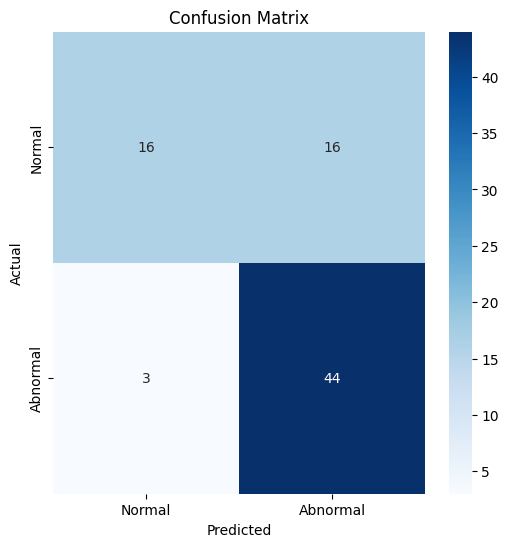

              precision    recall  f1-score   support

      Normal       0.84      0.50      0.63        32
    Abnormal       0.73      0.94      0.82        47

    accuracy                           0.76        79
   macro avg       0.79      0.72      0.72        79
weighted avg       0.78      0.76      0.74        79



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define image dimensions and batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training and validation data
train_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/Dental_V12/Dental_V1/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/Dental_V12/Dental_V1/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Build the model using MobileNetV2
def build_mobilenet_model(input_shape):
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze the base model for initial training

    inputs = keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs, outputs)
    return model

# Compile the model
mobilenet_model = build_mobilenet_model((128, 128, 3))
mobilenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
history = mobilenet_model.fit(train_data, validation_data=val_data, epochs=epochs)

# Load test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dental_V12/Dental_V1/val',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# Get predictions and true labels
y_true = test_data.classes
y_pred_probs = mobilenet_model.predict(test_data)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=['Normal', 'Abnormal']))

# Function to predict and segregate images
def segregate_images(source_folder, model):
    normal_folder = os.path.join(source_folder, 'normal')
    abnormal_folder = os.path.join(source_folder, 'abnormal')

    os.makedirs(normal_folder, exist_ok=True)
    os.makedirs(abnormal_folder, exist_ok=True)

    for img_name in os.listdir(source_folder):
        img_path = os.path.join(source_folder, img_name)

        if os.path.isfile(img_path):
            img = image.load_img(img_path, target_size=IMG_SIZE)
            img_array = image.img_to_array(img)/255.0
            img_array = np.expand_dims(img_array, axis=0)
            prediction = model.predict(img_array)

            if prediction[0][0] > 0.5:
                shutil.copy(img_path, os.path.join(abnormal_folder, img_name))
            else:
                shutil.copy(img_path, os.path.join(normal_folder, img_name))

# Example to use model and segregate images (uncomment to use):
# mobilenet_model.save("/content/drive/MyDrive/Final Year Project/Tooth_classification/mobilenet_model.h5")
# loaded_model = keras.models.load_model("/content/drive/MyDrive/Final Year Project/Tooth_classification/mobilenet_model.h5")
# segregate_images("/content/drive/MyDrive/Final Year Project/Tooth_classification/Dental_V1/test", loaded_model)


Found 483 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.4784 - loss: 0.9848 - val_accuracy: 0.5750 - val_loss: 0.7964
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 295ms/step - accuracy: 0.6910 - loss: 0.6398 - val_accuracy: 0.5750 - val_loss: 0.6719
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 339ms/step - accuracy: 0.7955 - loss: 0.4292 - val_accuracy: 0.5667 - val_loss: 0.6582
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 307ms/step - accuracy: 0.8118 - loss: 0.4164 - val_accuracy: 0.4917 - val_loss: 0.8086
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 297ms/step - accuracy: 0.7993 - loss: 0.3982 - val_accuracy: 0.5250 - val_loss: 0.7663
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 353ms/step - accuracy: 0.8937 - loss: 0.2870 - val_accuracy: 0.5917 - val_loss: 0.7197
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 311ms/step - accuracy: 0.8716 - loss: 0.3172 - val_accuracy: 0.5583 - val_loss: 0.7341
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 403ms/step - accuracy: 0.9229 - loss: 0.2522 - val_accuracy: 0.55

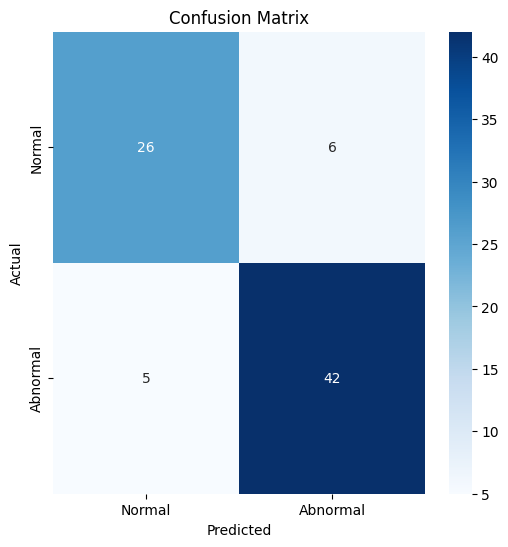

              precision    recall  f1-score   support

      Normal       0.84      0.81      0.83        32
    Abnormal       0.88      0.89      0.88        47

    accuracy                           0.86        79
   macro avg       0.86      0.85      0.85        79
weighted avg       0.86      0.86      0.86        79



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define image dimensions and batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training and validation data
train_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/Dental_V12/Dental_V1/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/Dental_V12/Dental_V1/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Build the model using VGG16
def build_vgg16_model(input_shape):
    base_model = tf.keras.applications.VGG16(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze base model for transfer learning

    inputs = keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs, outputs)
    return model

# Compile the model
vgg16_model = build_vgg16_model((128, 128, 3))
vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
history = vgg16_model.fit(train_data, validation_data=val_data, epochs=epochs)

# Load test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dental_V12/Dental_V1/val',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# Get predictions and true labels
y_true = test_data.classes
y_pred_probs = vgg16_model.predict(test_data)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=['Normal', 'Abnormal']))

# Function to predict and segregate images
def segregate_images(source_folder, model):
    normal_folder = os.path.join(source_folder, 'normal')
    abnormal_folder = os.path.join(source_folder, 'abnormal')

    os.makedirs(normal_folder, exist_ok=True)
    os.makedirs(abnormal_folder, exist_ok=True)

    for img_name in os.listdir(source_folder):
        img_path = os.path.join(source_folder, img_name)

        if os.path.isfile(img_path):
            img = image.load_img(img_path, target_size=IMG_SIZE)
            img_array = image.img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)
            prediction = model.predict(img_array)

            if prediction[0][0] > 0.5:
                shutil.copy(img_path, os.path.join(abnormal_folder, img_name))
            else:
                shutil.copy(img_path, os.path.join(normal_folder, img_name))

# Example to save and use the model:
# vgg16_model.save("/content/drive/MyDrive/Final Year Project/Tooth_classification/vgg16_model.h5")
# loaded_model = keras.models.load_model("/content/drive/MyDrive/Final Year Project/Tooth_classification/vgg16_model.h5")
# segregate_images("/content/drive/MyDrive/Final Year Project/Tooth_classification/Dental_V1/test", loaded_model)
